In [91]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import sklearn          


In [92]:
df=pd.read_csv(r'E:\git_demo\src\native\StudentsPerformance.csv')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [93]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [94]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [95]:
df.duplicated().sum()

np.int64(0)

In [96]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [97]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [98]:
print("df[isna().sum()]:\n",df.isna().sum() )

df[isna().sum()]:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [99]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [100]:
print(df['gender'].unique())
print(df['race/ethnicity'].unique())
print(df['parental level of education'].unique())
print(df['lunch'].unique())
print(df['test preparation course'].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [101]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [102]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Numerical Features:", numerical_features)
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Categorical Features:", categorical_features)

Numerical Features: ['math score', 'reading score', 'writing score']
Categorical Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [103]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

In [104]:
df['average_score'] = df['total_score'] / 3

In [105]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [106]:
reading_full=df[df['reading score']==100]['average_score'].count()
print("Number of students with full reading score:",reading_full)
writing_full=df[df['writing score']==100]['average_score'].count()
print("Number of students with full writing score:",writing_full)
math_full=df[df['math score']==100]['average_score'].count()
print("Number of students with full math score:",math_full)

Number of students with full reading score: 17
Number of students with full writing score: 14
Number of students with full math score: 7


In [107]:
reading_less_20=df[df['reading score']<=20]['average_score'].count()
print("Number of students with reading score less than or equal to 20:", reading_less_20)
writing_less_20=df[df['writing score']<=20]['average_score'].count()
print("Number of students with writing score less than or equal to 20:", writing_less_20)
math_less_20=df[df['math score']<=20]['average_score'].count()          
print("Number of students with math score less than or equal to 20:", math_less_20) 

Number of students with reading score less than or equal to 20: 1
Number of students with writing score less than or equal to 20: 3
Number of students with math score less than or equal to 20: 4


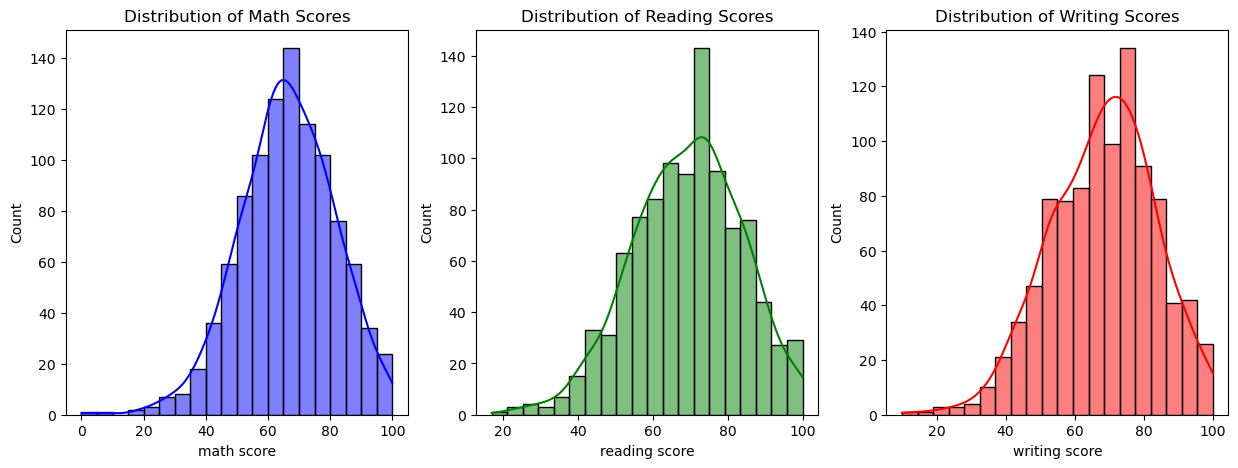

In [108]:
fiq,axs=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=df,x='math score',bins=20,ax=axs[0],kde=True,color='blue').set_title('Distribution of Math Scores')
sns.histplot(data=df,x='reading score',bins=20,ax=axs[1],kde=True,color='green').set_title('Distribution of Reading Scores')
sns.histplot(data=df,x='writing score',bins=20,ax=axs[2],kde=True,color='red').set_title('Distribution of Writing Scores')
plt.show()

In [109]:
df.shape

(1000, 10)

In [110]:
num_features = df.select_dtypes(exclude='object').columns

In [111]:
df.columns
X = df.drop(columns=['math score'],axis=1)
Y=df['math score']

In [112]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [113]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [114]:
num_features = X.select_dtypes(exclude='object').columns
categorical_features=X.select_dtypes(include='object').columns


In [115]:
categorical_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [116]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer([
    ("oneHotEncoder", oh_transformer, categorical_features),
    ("StandardScaler", numeric_transformer, num_features)
])


In [117]:
X=preprocessor.fit_transform(X)



In [118]:
X


array([[ 1.        ,  0.        ,  0.        , ...,  0.39149181,
         0.34357423,  0.34357423],
       [ 1.        ,  0.        ,  0.        , ...,  1.31326868,
         1.0219275 ,  1.0219275 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.64247471,
         1.74706375,  1.74706375],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.20107904,
        -0.19443008, -0.19443008],
       [ 1.        ,  0.        ,  0.        , ...,  0.58901542,
         0.46053169,  0.46053169],
       [ 1.        ,  0.        ,  0.        , ...,  1.18158627,
         1.06871048,  1.06871048]])

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings("ignore")

In [125]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=100, gamma=0.1),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
   
}

# 🧾 STEP 6: Train and Validate All Models
print("\n🔍 Training and Validating Models...\n")
results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(Y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    r2 = r2_score(Y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })



🔍 Training and Validating Models...



In [128]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(Y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    r2 = r2_score(Y_test, y_pred)

    print(f"📊 {name}")
    print(f"   R² Score : {r2:.4f}")
    print(f"   RMSE     : {rmse:.4f}")
    print(f"   MAE      : {mae:.4f}")
    print("-" * 45)

print("\n✅ Validation Complete — all model results printed above.")

📊 Linear Regression
   R² Score : 1.0000
   RMSE     : 0.0000
   MAE      : 0.0000
---------------------------------------------
📊 Ridge
   R² Score : 0.9995
   RMSE     : 0.3432
   MAE      : 0.2684
---------------------------------------------
📊 Lasso
   R² Score : 0.9999
   RMSE     : 0.1229
   MAE      : 0.0958
---------------------------------------------
📊 ElasticNet
   R² Score : 0.9948
   RMSE     : 1.1287
   MAE      : 0.8807
---------------------------------------------
📊 Decision Tree
   R² Score : 0.9393
   RMSE     : 3.8425
   MAE      : 2.9650
---------------------------------------------
📊 Random Forest
   R² Score : 0.9615
   RMSE     : 3.0595
   MAE      : 2.1822
---------------------------------------------
📊 Gradient Boosting
   R² Score : 0.9558
   RMSE     : 3.2814
   MAE      : 2.5359
---------------------------------------------
📊 Support Vector Regressor
   R² Score : 0.9855
   RMSE     : 1.8768
   MAE      : 0.3765
---------------------------------------------
